#### OneDay dataset Analysis

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("odi_record.csv")
df= df.reset_index()
df = df.drop(['index'],axis = 1)
df.rename(columns = {'0':'player'}, inplace = True)
df.rename(columns = {'empty':'total_balls'}, inplace = True)
df

,level_0,player,runs,balls,total_balls,fours,sixes,strike_rate,out_type,outby
0,0,Virat Kohli,12,22,33,1,0,54.54,lbw,Kulasekara
1,1,Virat Kohli,12,22,33,1,0,54.54,lbw,Kulasekara
2,2,Virat Kohli,37,67,82,6,0,55.22,catch_out,Thushara
3,3,Virat Kohli,25,38,40,4,0,65.78,run_out,(Silva)
4,4,Virat Kohli,54,66,87,7,0,81.81,,Thushara
...,...,...,...,...,...,...,...,...,...,...
247,247,Virat Kohli,8,4,6,2,0,200,catch_out,Joseph
248,248,Virat Kohli,18,30,42,3,0,60,catch_out,Smith
249,249,Virat Kohli,0,2,2,0,0,0,catch_out,Joseph
250,250,Virat Kohli,16,25,39,3,0,64,catch_out,Willey


In [25]:
df['total_balls'] = df['total_balls'].replace('-','0')
df['strike_rate'] = df['strike_rate'].replace('-','0')

df['out_type'] = df['out_type'].replace('n','not_out')
df['out_type'] = df['out_type'].replace(' ','not_out')
df['out_type'] = df['out_type'].replace('n','not_out')
df['out_type'] = df['out_type'].replace('s','catch_out')
df['out_type'] = df['out_type'].replace('h','run_out')

    #linear regression strike rate vs balls played
    #runs vs balls played
    #runs vs strike rates
    #4and 6 vs out type --> lbw or catch_out
    #strike rate vs outtype --> decision tree model
    #dot balls and out_type

### Linear Regression balls played vs strike rate


simple model of linear regression is: 
$y = \alpha + \beta x + c$


Since, we are using the multiple linear regression model, we will have to expand the simple model.


$ y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + .......+c$


where $y$ is the target variable and the $x$ are the prediction variable

In [26]:
df['balls']=df['balls'].astype(int) 
# df['total_balls']=df['total_balls'].astype(int)
df['strike_rate'] = df['strike_rate'].astype(float)
df['out_type'].unique()
df

,level_0,player,runs,balls,total_balls,fours,sixes,strike_rate,out_type,outby
0,0,Virat Kohli,12,22,33,1,0,54.54,lbw,Kulasekara
1,1,Virat Kohli,12,22,33,1,0,54.54,lbw,Kulasekara
2,2,Virat Kohli,37,67,82,6,0,55.22,catch_out,Thushara
3,3,Virat Kohli,25,38,40,4,0,65.78,run_out,(Silva)
4,4,Virat Kohli,54,66,87,7,0,81.81,not_out,Thushara
...,...,...,...,...,...,...,...,...,...,...
247,247,Virat Kohli,8,4,6,2,0,200.00,catch_out,Joseph
248,248,Virat Kohli,18,30,42,3,0,60.00,catch_out,Smith
249,249,Virat Kohli,0,2,2,0,0,0.00,catch_out,Joseph
250,250,Virat Kohli,16,25,39,3,0,64.00,catch_out,Willey


In [27]:
total_balls = df[['total_balls']]
strike_rate = df[['strike_rate']]
type(total_balls)
#splitting the data into test dataset and train dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(total_balls,strike_rate,test_size =0.2)
len(x_train)

201

In [28]:
 y_test.values.reshape((1,len(y_test)))
    
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#from sklearn importing the library to perform the linear regression
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [29]:
#using linear regression to find out the relationship bw the balls palyed and the strike rate of the player
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

result = pd.DataFrame({
    "Actual": y_test.values.reshape((1,len(y_test)))[0],
    "predicted": y_pred.reshape((1,len(y_test)))[0]
})
result.head()

,Actual,predicted
0,42.85,65.042692
1,129.47,86.716401
2,114.92,117.637560
3,64.91,87.583350
4,100.00,61.863881


In [30]:
print("the regression coefficents are :",regr.coef_)
print("the regression intercept is :",regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(x_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(x_test, y_pred))

the regression coefficents are : [[0.28898279]]
the regression intercept is : [59.26303603]
Mean squared error: 1515.43
Coefficient of determination: 0.48


We have received the regression coefficient as 0.157 and the intercept as 66.98. Mean square error is 1460

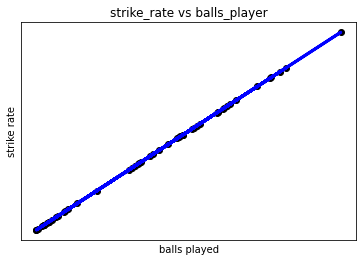

In [31]:
# Plotting the strike rate vs balls played by virat kohli
import matplotlib.pyplot as plt
plt.scatter(x_test, y_pred.reshape((1,len(y_test)))[0], color="black")
plt.plot(x_test["total_balls"], y_pred.reshape((1,len(y_test)))[0], color="blue", linewidth=3)
plt.title("strike_rate vs balls_player")
plt.xlabel("balls played")
plt.ylabel("strike rate")
plt.xticks(())
plt.yticks(())
plt.show()

strike rate vs Balls played 
the above regression line tells that there is a direct relation between the balls played and the strike rate in the one day match.

#### enter Number of balls played to predict the what would be the strike rate...!

In [32]:
value = input("Enter Number of balls played to Predict Strike Rate:--->")
value= [[value]]
pred_sr = regr.predict(value)
print("the predicted strike Rate is :->")
print(pred_sr)

Enter Number of balls played to Predict Strike Rate:--->100
the predicted strike Rate is :->
[[88.1613151]]


C:\Users\Anand\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Anand\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


runs vs balls played

Text(0, 0.5, 'runs')

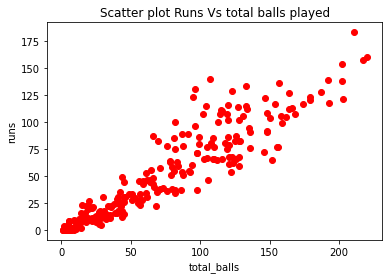

In [33]:
plt.scatter(df['total_balls'].astype(int),df['runs'].astype(int), color = 'red')
plt.title("Scatter plot Runs Vs total balls played")
plt.xlabel("total_balls")
plt.ylabel("runs")

if we look at the scatter plot betwnn 100 to 150, his strike rate remain the same or it has increased. And in most of the matches he has played less than 100 balls.

Text(0, 0.5, 'strike rate')

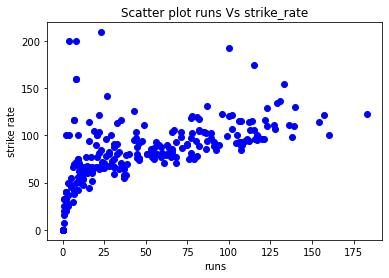

In [34]:
# runs vs strike rates 
plt.scatter(df['runs'].astype(int),df['strike_rate'].astype(int), color = 'blue')
plt.title("Scatter plot runs Vs strike_rate")
plt.xlabel("runs")
plt.ylabel("strike rate")

between 0 to 30 balls the strike rate is increasing sharply after that it is increasing slowly.

In [35]:
df['out_type'].unique()

array(['lbw', 'catch_out', 'run_out', 'not_out'], dtype=object)

In [36]:
l = len(df)
# lbw4= 0, lbw6=0,co4=0,co6=0,no4=0,no6=0,ro4=0,ro6=0
lf=0
ls =0
cf=0
cs =0
nf =0
ns =0
rf =0
rs=0
for i in range(l):
    if df['out_type'][i] == 'lbw':
        lf=lf+df['fours'][i]
        ls= ls+df['sixes'][i]
    elif df['out_type'][i] == 'catch_out':
        cf=cf+df['fours'][i]
        cs= cs+df['sixes'][i]
    elif df['out_type'][i] == 'not_out':
        nf=nf+df['fours'][i]
        ns= ns+df['sixes'][i]
    else:
        rf=rf+df['fours'][i]
        rs= rs+df['sixes'][i]
print(lf)

44


In [37]:
df['out_type']

0            lbw
1            lbw
2      catch_out
3        run_out
4        not_out
         ...    
247    catch_out
248    catch_out
249    catch_out
250    catch_out
251    catch_out
Name: out_type, Length: 252, dtype: object

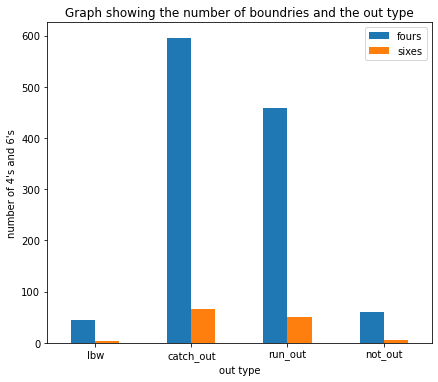

In [38]:
# histogram of out_type and the number of 4s and sixes in the dataset
tags = ( 'lbw', 'catch_out', 'run_out', 'not_out')
# insert some newlines in the tags to better fit into the plot
tags = [tag.replace(' (', '\n(') for tag in tags]
fours = (lf,cf,nf,rf)
sixes = (ls,cs,ns,rs)

# create a dataframe
df_temp = pd.DataFrame({"fours": fours, "sixes": sixes}, index=tags)
df_temp.plot.bar(rot=0, figsize=(6, 5))
plt.tight_layout() # fit labels etc. nicely into the plot
plt.xlabel("out type")
plt.ylabel("number of 4's and 6's")
plt.title("Graph showing the number of boundries and the out type")
plt.show()


The data is showing that the matches in which he scored more boundries in those matches he has the hight chanses of getting catch out or run_out

### decisionTree Model
The decision tree is a supervised learning algorithm that involves dividing data into smaller and smaller subsets until each subset can be classified. It relies on concepts like nodes, edges, and leaf nodes to classify the data. The algorithm starts by calculating the entropy, or uncertainty, of the database. A lower entropy value indicates better classification results. The algorithm then calculates the information gain of each feature, which is a measure of how much uncertainty is reduced by splitting the data on that feature. The data is then split on the feature with the highest information gain, and the process is repeated until all the nodes are cleared.

source:https://www.sciencedirect.com/topics/computer-science/decision-tree-classifier

In [39]:
# building a predictinv model such as decision tree to find out that with all the realevant parameter 
#what could be his out_type

#=================================================================================
#decision tree method
#=================================================================================
# since machine learning algo does not able to understand the strings we have to convert it into a numerical values
df2 = df
from sklearn.preprocessing import LabelEncoder
#creating object for the label encoder
out = LabelEncoder()
df2['out_type']= out.fit_transform(df2['out_type'])
df2 = df2.drop(['outby'], axis=1)
df2 = df2.drop(['player'], axis=1)
df2 = df2.drop(['level_0'], axis=1)
df2

,runs,balls,total_balls,fours,sixes,strike_rate,out_type
0,12,22,33,1,0,54.54,1
1,12,22,33,1,0,54.54,1
2,37,67,82,6,0,55.22,0
3,25,38,40,4,0,65.78,3
4,54,66,87,7,0,81.81,2
...,...,...,...,...,...,...,...
247,8,4,6,2,0,200.00,0
248,18,30,42,3,0,60.00,0
249,0,2,2,0,0,0.00,0
250,16,25,39,3,0,64.00,0


In [40]:
df.corr()

,level_0,runs,balls,total_balls,fours,sixes,strike_rate,out_type
level_0,1.000000,0.126814,0.084573,0.067019,0.103113,0.114609,0.162410,-0.082487
runs,0.126814,1.000000,0.959904,0.930807,0.916152,0.565467,0.586933,0.192629
balls,0.084573,0.959904,1.000000,0.963827,0.833789,0.459215,0.474477,0.153753
total_balls,0.067019,0.930807,0.963827,1.000000,0.791839,0.474357,0.464741,0.142934
fours,0.103113,0.916152,0.833789,0.791839,1.000000,0.431119,0.595915,0.254177
sixes,0.114609,0.565467,0.459215,0.474357,0.431119,1.000000,0.427295,0.108172
strike_rate,0.162410,0.586933,0.474477,0.464741,0.595915,0.427295,1.000000,0.216450
out_type,-0.082487,0.192629,0.153753,0.142934,0.254177,0.108172,0.216450,1.000000


In [41]:
predictor =['runs','balls','total_balls','fours','sixes','strike_rate']
x = df[predictor]
y = df['out_type']

#splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train

,runs,balls,total_balls,fours,sixes,strike_rate
224,26,27,45,3,0,96.29
35,63,70,83,6,2,90.00
144,33,41,49,5,0,80.48
177,11,22,22,2,0,50.00
129,1,3,9,0,0,33.33
...,...,...,...,...,...,...
174,96,78,96,13,0,123.07
77,66,83,116,2,0,79.51
89,6,9,12,1,0,66.66
179,111,115,115,12,2,96.52


#### 'gini'
gini impurity is more efficient in terms of the computing power compartively to entropy
we can use gini to select the best features

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')

In [43]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
classifier.predict(x_test)

array([0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       3, 3, 0, 0, 0, 0, 0])

In [45]:
acc = classifier.score(x_test,y_test)
print("Percentage Accuracy obtained from the decision tree classifier =")
print(acc*100)

Percentage Accuracy obtained from the decision tree classifier =
49.01960784313725


[Text(0.46337890625, 0.9666666666666667, 'X[3] <= 2.5\ngini = 0.482\nsamples = 201\nvalue = [136, 8, 48, 9]'),
 Text(0.169921875, 0.9, 'X[1] <= 7.0\ngini = 0.289\nsamples = 85\nvalue = [71, 3, 9, 2]'),
 Text(0.125, 0.8333333333333334, 'X[2] <= 11.5\ngini = 0.411\nsamples = 26\nvalue = [19, 0, 6, 1]'),
 Text(0.109375, 0.7666666666666667, 'X[2] <= 8.5\ngini = 0.344\nsamples = 24\nvalue = [19, 0, 4, 1]'),
 Text(0.078125, 0.7, 'X[2] <= 5.5\ngini = 0.277\nsamples = 19\nvalue = [16, 0, 2, 1]'),
 Text(0.0625, 0.6333333333333333, 'X[0] <= 2.5\ngini = 0.43\nsamples = 11\nvalue = [8, 0, 2, 1]'),
 Text(0.046875, 0.5666666666666667, 'X[2] <= 3.5\ngini = 0.34\nsamples = 10\nvalue = [8, 0, 1, 1]'),
 Text(0.03125, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]'),
 Text(0.0625, 0.5, 'X[1] <= 4.0\ngini = 0.56\nsamples = 5\nvalue = [3, 0, 1, 1]'),
 Text(0.03125, 0.43333333333333335, 'X[2] <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 1]'),
 Text(0.015625, 0.36666666666666664, 'gini = 0.0\nsamp

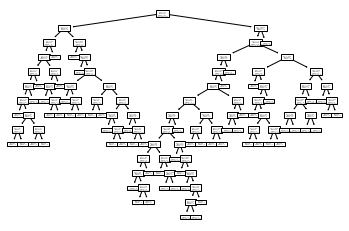

In [46]:
from sklearn import tree
tree.plot_tree(classifier)

#### calculating entropy
Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data.
it can be calculated by the following way

$ E = - \sum_{i=1}^{N} p_ilog_2p_i$


In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_test,y_test)

DecisionTreeClassifier(criterion='entropy')

In [48]:
classifier.predict(x_test)

array([0, 2, 0, 2, 0, 1, 2, 2, 3, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 2, 3, 2,
       0, 3, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 1])

In [49]:
classifier.score(x_test,y_test)

1.0

[Text(0.5666666666666667, 0.9375, 'X[5] <= 93.48\nentropy = 1.728\nsamples = 51\nvalue = [23, 7, 17, 4]'),
 Text(0.3, 0.8125, 'X[0] <= 19.0\nentropy = 1.683\nsamples = 27\nvalue = [14, 7, 2, 4]'),
 Text(0.13333333333333333, 0.6875, 'X[0] <= 1.5\nentropy = 1.484\nsamples = 14\nvalue = [9, 2, 2, 1]'),
 Text(0.06666666666666667, 0.5625, 'X[1] <= 0.5\nentropy = 1.5\nsamples = 4\nvalue = [1, 2, 0, 1]'),
 Text(0.03333333333333333, 0.4375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.1, 0.4375, 'X[5] <= 8.33\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0, 0]'),
 Text(0.06666666666666667, 0.3125, 'X[2] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0, 0]'),
 Text(0.03333333333333333, 0.1875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.1, 0.1875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.13333333333333333, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.2, 0.5625, 'X[1] <= 19.0\nentropy = 0.722\nsamples = 10\nvalue = 

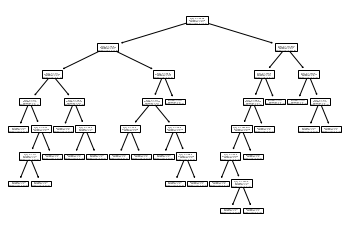

In [50]:
from sklearn import tree
tree.plot_tree(classifier)

In [62]:
import numpy as np
# Calculate the bias
y_pred=y_pred.flatten()
# y_test.flatten()
bias = np.mean(y_pred-y_test)
print("bias in data")
print(bias)

variance = np.var(y_pred)
print("variance in data")
print(variance)

bias in data
79.98252458341003
variance in data
244.91432046086717
